In [ ]:
#PAPER TITLE: A Machine Learning Approach for the Classification of Cardiac Arrhythmia
#NAME: Gustavo Manuel de Oliveira Bastos Cordeiro
#JMBAG: 0036544543

In [20]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [21]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data'

In [22]:
# loading dataset into Pandas DataFrame
lst = range(280)
df = pd.read_csv(url, names = lst)

In [23]:
# Replace unknown values (?) with NaN (Null)
# Standard Scaler treats NaN values as missing values

from sklearn.preprocessing import StandardScaler

df = df.replace('?', np.NaN)
# Separating out the features
x = df.loc[:,lst[:-1]].values

# Separating out target
y = df.loc[:,len(lst) - 1].values

# Standardizing the features
x_standard = StandardScaler().fit_transform(x)

In [24]:
# Impute missing values with KNNImputer algorithm

from sklearn.impute import KNNImputer

imputer = KNNImputer()
x = imputer.fit_transform(x_standard)

In [25]:
# Obtain the components that represent 99% of the variance of the data set

from sklearn.decomposition import PCA

pca = PCA(0.99)

pca.fit(x)

len(pca.explained_variance_ratio_) # Number of components to obtain 99% variance

154

In [26]:
# Apply the Principal Components Algorithm (PCA) to the first 150 components of the data set (as it was done in the paper)

pca = PCA(n_components=150)

principalComponents = pca.fit_transform(x)

lst2 = range(150)
principalDf = pd.DataFrame(data = principalComponents, columns= lst2)

In [27]:
# Split the reduced data set into train and test data 

from sklearn.model_selection import train_test_split

X = principalDf
Y = np.ravel(y) # Transforms the targets into a 1D array

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=125/452, random_state=1) # Use 125 samples as test data (as it was done in the paper) 

In [28]:
# Implement the Classification Algorithms 
from sklearn.svm import SVC # Support Vector Machines (SVM)
from sklearn.linear_model import LogisticRegression # Logistic Regression Algorithm
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors (KNN) Algorithm
from sklearn.ensemble import RandomForestClassifier # Random Forest Algorithm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [29]:
# Support Vector Machines (SVM)

SVM_pipe = Pipeline([('SVM', SVC())])


params = {'SVM__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
           'SVM__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputedz'],
           'SVM__gamma': ['scale', 'auto']}


gs_SVM = GridSearchCV(SVM_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

gs_SVM.fit(X_train, Y_train)
gs_SVM.best_params_
Y_pred_SVM = gs_SVM.predict(X_test)

In [30]:
# Logistic Regression Algorithm

LR_pipe = Pipeline([('LR', LogisticRegression())])

params = {'LR__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
           'LR__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

gs_LR = GridSearchCV(LR_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
                      
gs_LR.fit(X_train, Y_train)
gs_LR.best_params_
Y_pred_LR=gs_LR.predict(X_test)

In [31]:
# K-Nearest Neighbors (KNN) Algorithm

KNN_pipe = Pipeline([('KNN', KNeighborsClassifier())])

params = {'KNN__n_neighbors': [1, 2, 3, 5, 7, 9, 10],
           'KNN__weights': ['uniform', 'distance'],
           'KNN__leaf_size': [15, 20], 
           'KNN__metric': ['euclidean', 'minkowski']}
gs_KNN = GridSearchCV(KNN_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

gs_KNN.fit(X_train, Y_train)
gs_KNN.best_params_
Y_pred_KNN = gs_KNN.predict(X_test)

In [32]:
# Random Forest Algorithm

RF_pipe = Pipeline([('RF', RandomForestClassifier())])


params = {'RF__n_estimators': [5, 50, 100, 200],
            'RF__max_depth' : [None, 10,20],
            'RF__min_samples_split' : [2, 5, 10, 20]}


gs_RF = GridSearchCV(RF_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

gs_RF.fit(X_train, Y_train)
gs_RF.best_params_
Y_pred_RF = gs_RF.predict(X_test)

In [33]:
# Show results of Support Vector Machines (SVM)

result = confusion_matrix(Y_test, Y_pred_SVM)
print('Confusion Matrix:')
print(result)
SVM_classification_report = classification_report(Y_test, Y_pred_SVM)
print('Classification Report:',)
print (SVM_classification_report)
SVM_accuracy = accuracy_score(Y_test,Y_pred_SVM)
print('Accuracy:',SVM_accuracy)

Confusion Matrix:
[[67  0  0  0  0  1  0  0  0  0  0]
 [ 3  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0]
 [ 4  0  0  0  1  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  3  0  0  0]
 [ 4  2  0  0  0  0  0  0 10  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.99      0.84        68
           2       0.80      0.73      0.76        11
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         1
           5       1.00      0.20      0.33         5
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         1
           9       1.00      0.75      0.86         4
          10       1.00      0.62      0.77        16
          14       0.

In [34]:
# Show results of Logistic Regression Algorithm

result = confusion_matrix(Y_test, Y_pred_LR)
print('Confusion Matrix:')
print(result)
LR_classification_report = classification_report(Y_test, Y_pred_LR)
print('Classification Report:',)
print (LR_classification_report)
LR_accuracy = accuracy_score(Y_test,Y_pred_LR)
print('Accuracy:',LR_accuracy)

Confusion Matrix:
[[62  1  0  0  0  2  0  0  0  0  3]
 [ 2  8  1  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0]
 [ 3  0  0  1  1  0  0  0  0  0  0]
 [ 1  1  0  0  0  2  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0]
 [ 3  2  0  0  0  0  0  0 11  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  1]
 [ 2  1  1  0  0  1  0  0  0  0  1]]
Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.91      0.87        68
           2       0.62      0.73      0.67        11
           3       0.78      1.00      0.88         7
           4       0.50      1.00      0.67         1
           5       1.00      0.20      0.33         5
           6       0.40      0.50      0.44         4
           7       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         4
          10       1.00      0.69      0.81        16
          14       1.

In [35]:
# Show results of K-Nearest Neighbors (KNN) Algorithm

result = confusion_matrix(Y_test, Y_pred_KNN)
print('Confusion Matrix:')
print(result)
KNN_classification_report = classification_report(Y_test, Y_pred_KNN)
print('Classification Report:',)
print (KNN_classification_report)
KNN_accuracy = accuracy_score(Y_test,Y_pred_KNN)
print('Accuracy:',KNN_accuracy)

Confusion Matrix:
[[66  2  0  0  0  0  0  0  0  0  0  0]
 [10  1  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  2  0  0  1  0  0  0  0  1  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 3  2  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  2  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  2  0  0  0  0]
 [12  0  0  0  0  0  0  0  4  0  0  0]
 [ 1  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  1  0  0  0  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.63      0.97      0.77        68
           2       0.17      0.09      0.12        11
           3       1.00      0.29      0.44         7
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         5
           6       0.40      0.50      0.44         4
           7       0.00      0.00      0.00         1
           9       1.00      0.50      0.67         4
   

In [36]:
# Show results of Random Forest Algorithm

result = confusion_matrix(Y_test, Y_pred_RF)
print('Confusion Matrix:')
print(result)
RF_classification_report = classification_report(Y_test, Y_pred_RF)
print('Classification Report:',)
print (RF_classification_report)
RF_accuracy = accuracy_score(Y_test,Y_pred_RF)
print('Accuracy:',RF_accuracy)

Confusion Matrix:
[[68  0  0  0  0  0  0  0  0  0  0]
 [10  1  0  0  0  0  0  0  0  0  0]
 [ 3  3  0  0  0  0  0  0  1  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  0  0  0  0  0  0  1  0  0]
 [12  0  0  0  0  0  0  0  4  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.60      1.00      0.75        68
           2       0.17      0.09      0.12        11
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         4
          10       0.67      0.25      0.36        16
          14       0.

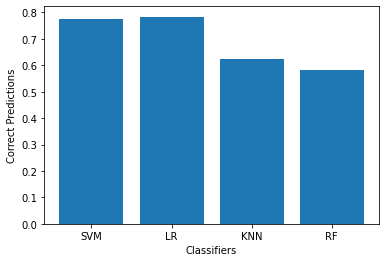

In [37]:
import matplotlib.pyplot as plt
plt.bar(x=['SVM','LR','KNN','RF'],height=[SVM_accuracy,LR_accuracy,KNN_accuracy,RF_accuracy])
plt.xlabel('Classifiers')
plt.ylabel('Correct Predictions')
plt.show()

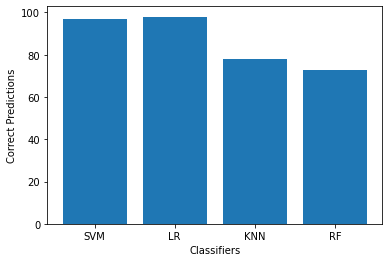

In [41]:
import matplotlib.pyplot as plt
plt.bar(x=['SVM','LR','KNN','RF'],height= [SVM_accuracy*125,LR_accuracy*125,KNN_accuracy*125,RF_accuracy*125])
plt.xlabel('Classifiers')
plt.ylabel('Correct Predictions')
plt.show()